<a href="https://colab.research.google.com/github/cxhiggins/ml/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TensorFlow versions in Colab


##Background
Colab has two versions of TensorFlow pre-installed: a 2.x version and a 1.x version. Colab uses TensorFlow 2.x by default, though you can switch to 1.x by the method shown below.


##Specifying the TensorFlow version

Running `import tensorflow` will import the default version (currently 2.x). You can use 1.x by running a cell with the `tensorflow_version` magic **before** you run `import tensorflow`.

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


Once you have specified a version via this magic, you can run `import tensorflow` as normal and verify which version was imported as follows:

In [1]:
import tensorflow
print(tensorflow.__version__)

2.4.0-rc0


If you want to switch TensorFlow versions after import, you **will need to restart your runtime** with 'Runtime' -> 'Restart runtime...' and then specify the version before you import it again.

## Avoid Using ``pip install`` with GPUs and TPUs

We recommend against using ``pip install`` to specify a particular TensorFlow version for both GPU and TPU backends. Colab builds TensorFlow from source to ensure compatibility with our fleet of accelerators. Versions of TensorFlow fetched from PyPI by ``pip`` may suffer from performance problems or may not work at all.

# Lab 3 Tests

In [5]:
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)

# from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers, optimizers

In [6]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.05)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
def one_hot(labels):
  return tf.one_hot(labels, len(np.unique(labels)))

In [9]:
train_labels = one_hot(train_labels)
test_labels = one_hot(test_labels)

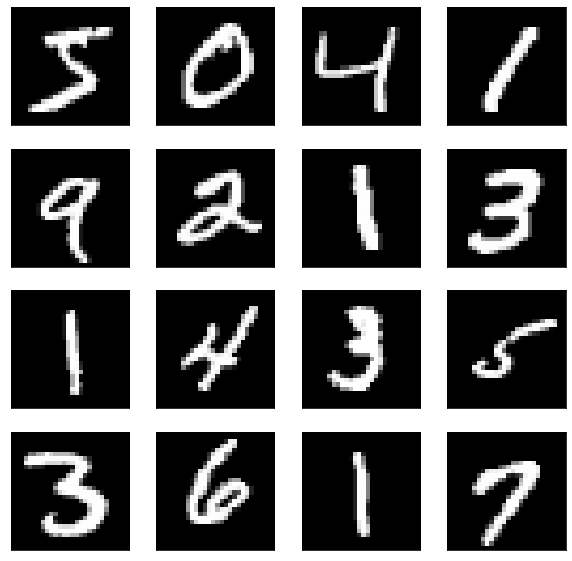

In [10]:
# Let us visualise the first 16 data points from the MNIST training data

fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(train_images[i].reshape(28, 28), cmap='Greys_r')  

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(
    filters=25,
    kernel_size=(12, 12),
    strides=(2,2),
    activation='relu',
    input_shape=(28, 28, 1),
    padding='valid',  # uses no padding
    kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.05),
    use_bias=True,
    bias_initializer=initializers.Constant(0.1)
))
model.add(layers.Conv2D(
    filters=64,
    kernel_size=(5, 5),
    strides=(1,1),
    activation='relu',
    padding='same'  # pads to maintain width and height
))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(
    units=1024,
    activation='relu'
))
model.add(layers.Dropout(
    rate=0.2
))
model.add(layers.Dense(
    units=10,
    activation='softmax'
))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 9, 9, 25)          3625      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          40064     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [12]:
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(
        from_logits=False,
        label_smoothing=0, 
        reduction=tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE,
    ),
    metrics=['accuracy']
)

history = model.fit(
    train_images.reshape(60000, 28, 28, 1),
    train_labels,
    batch_size=50,
    steps_per_epoch=100,
    epochs=50, 
    validation_data=(test_images.reshape(10000, 28, 28, 1), test_labels)
)

Epoch 1/50
100/100 [==============================] - 10s 95ms/step - loss: 1.8986 - accuracy: 0.4423 - val_loss: 0.5843 - val_accuracy: 0.8490
Epoch 2/50
100/100 [==============================] - 11s 111ms/step - loss: 0.5870 - accuracy: 0.8245 - val_loss: 0.3836 - val_accuracy: 0.8883
Epoch 3/50
100/100 [==============================] - 9s 92ms/step - loss: 0.4105 - accuracy: 0.8796 - val_loss: 0.3100 - val_accuracy: 0.9110
Epoch 4/50
100/100 [==============================] - 10s 98ms/step - loss: 0.3257 - accuracy: 0.9005 - val_loss: 0.2596 - val_accuracy: 0.9264
Epoch 5/50
100/100 [==============================] - 10s 100ms/step - loss: 0.3149 - accuracy: 0.9031 - val_loss: 0.2350 - val_accuracy: 0.9282
Epoch 6/50
100/100 [==============================] - 9s 93ms/step - loss: 0.2595 - accuracy: 0.9196 - val_loss: 0.2030 - val_accuracy: 0.9387
Epoch 7/50
100/100 [==============================] - 9s 94ms/step - loss: 0.2498 - accuracy: 0.9279 - val_loss: 0.1799 - val_accuracy: 

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


313/313 - 1s - loss: 0.0457 - accuracy: 0.1061


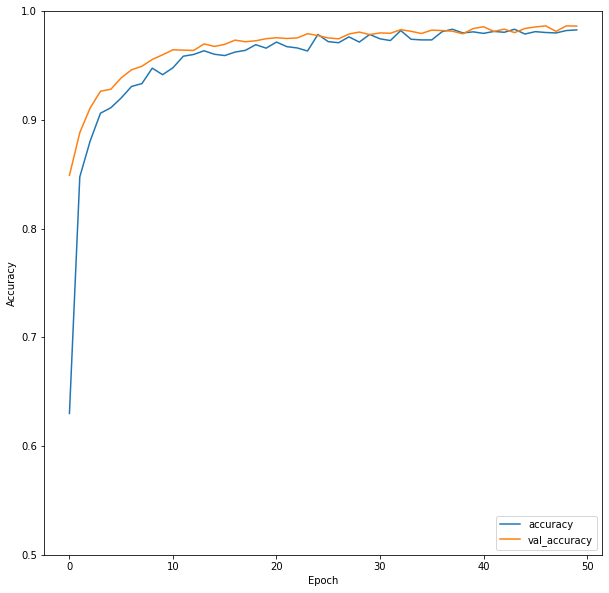

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images.reshape(10000, 28, 28, 1),  test_labels, verbose=2)

With minibatches of size 50 and 5000 iterations (50 epochs of 100 iterations each), the accuracy with this model is 0.9891999959945679!

---



In [15]:
def visualize_prediction(image_data):
  assert(len(image_data) >= 16)
  predictions = list(map(np.argmax, model.predict(image_data[:16].reshape(16, 28, 28, 1))))

  fig = plt.figure()
  for i in range(16):
      ax = fig.add_subplot(4, 4, i + 1)
      ax.set_xticks(())
      ax.set_yticks(())
      ax.imshow(image_data[i].reshape(28, 28), cmap='Greys_r')
      ax.set_xlabel(predictions[i])

  fig.subplots_adjust(hspace=0.4)

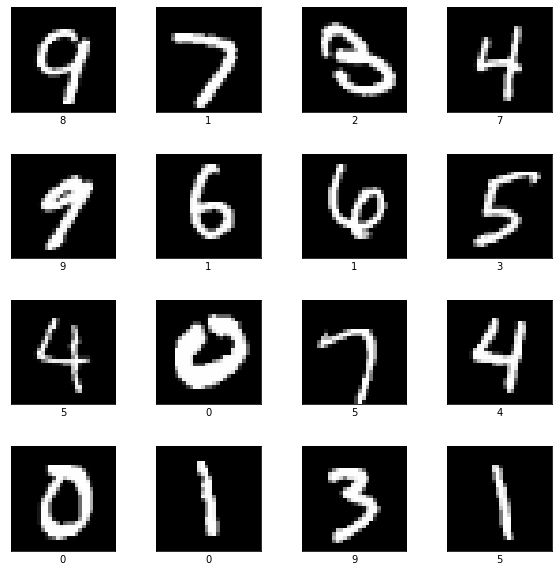

In [16]:
# Let us visualise the first 16 data points from the MNIST training data
visualize_prediction(test_images[16:32])

##### Unused prewritten code from the skeleton

In [33]:
tf.disable_v2_behavior()

x = tf.placeholder(tf.float32, shape=[None, 784])
x_ = tf.reshape(x, [-1, 28, 28, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

# Define the first convolution layer here
# TODO
# W_conv1 =
# b_conv1 = 
# h_conv1 = 

# Define the second convolution layer here
# W_conv2 = 
# b_conv2 = 
# h_conv2 = 

# Define maxpooling
# h_pool2 = 

# All subsequent layers will be fully connected ignoring geometry so we'll flatten the layer
# Flatten the h_pool2_layer (as it has a multidimensiona shape) 
# h_pool2_flat = 

# Define the first fully connected layer here
# W_fc1 = 
# b_fc1 = 
# h_fc1 = 

# Use dropout for this layer (should you wish)
# keep_prob = tf.placeholder(tf.float32)
# h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# The final fully connected layer
# W_fc2 = 
# b_fc2 = 
# y_conv = 

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [34]:
# We'll use the cross entropy loss function 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))

# And classification accuracy
correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# And the Adam optimiser
train_step = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cross_entropy)

NameError: ignored